#This is a diabetes dataset. 
## Lets explore it with python EDA
## Apply Logistic regression

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [4]:
df = pd.read_csv('diabetes.csv')
# To display the top 5 rows
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

Inspiration
# Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

In [5]:
# To display the bottom 5 rows
df.tail(5) 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
# Checking the data type
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

# Features

Pregnancies: Number of times 

Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test.

BloodPressure: Diastolic blood pressure (mm Hg).

SkinThickness: Triceps skin fold thickness (mm).

Insulin: 2-Hour serum insulin (mu U/ml).

BMI: Body mass index (weight in kg/(height in m)2).

DiabetesPedigreeFunction: iabetes pedigree function (a function which scores likelihood of diabetes based on family history).

Age: No explanation needed.

There are no irrelevant columns here" Outcome is the dependent variable where 0 denotes not diabetic and 1 for diabetic
# To drop irrelevant column in a dataset you can use: df = df.drop([‘Col Name’])

In [8]:
# Total number of rows and columns
df.shape

(768, 9)

In [10]:
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 9)


In [11]:
# Used to count the number of rows before removing the data
df.count() 

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [12]:
# Dropping the duplicates 
df = df.drop_duplicates()
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
df.count() 

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

# Dropping the missing or null values.

In [14]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


There are no missing values, if there were you can use
# df = df.dropna() 

# Looking at data using Box Plot

First we visualize by box plot to detect outliers

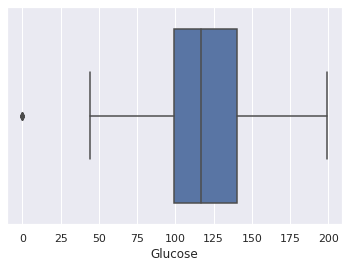

In [17]:
sns.boxplot(x=df['Glucose'])


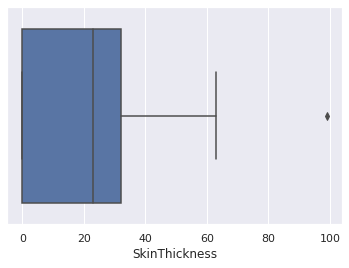

In [18]:
sns.boxplot(x=df['SkinThickness'])

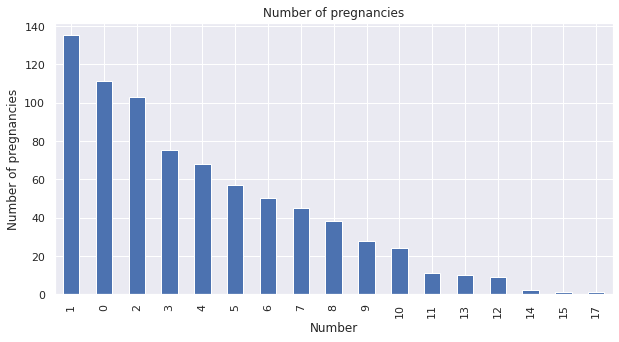

In [24]:
# Plotting a Histogram
df.Pregnancies.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Number of pregnancies')
plt.ylabel('Number of pregnancies')
plt.xlabel('Number');

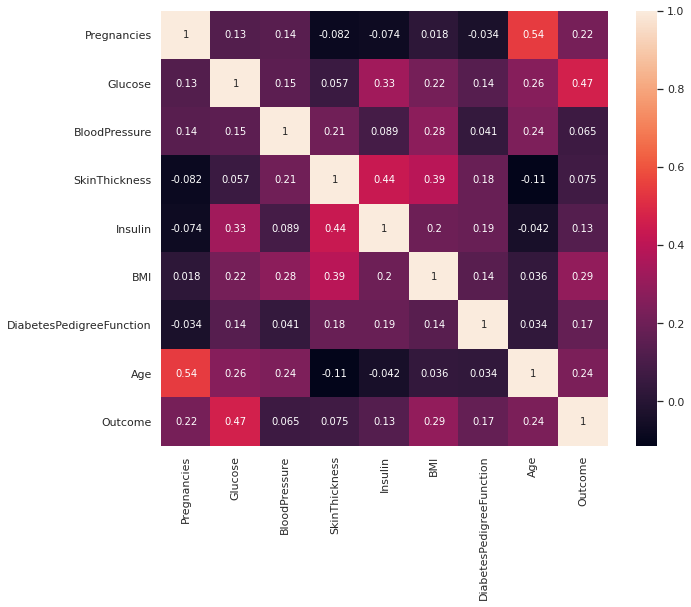

In [36]:
# Finding the relations between the variables.
# Plotting Correlation Matrix using Heatmap

plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot =True);

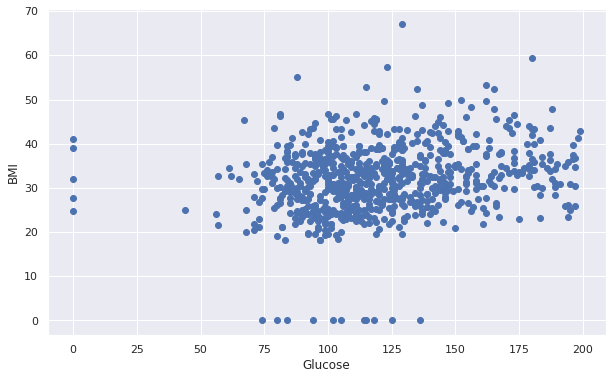

In [28]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['Glucose'], df['BMI'])
ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
plt.show()

In [29]:
# To do descriptive statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [31]:
# See the distribution of the outcome variable
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

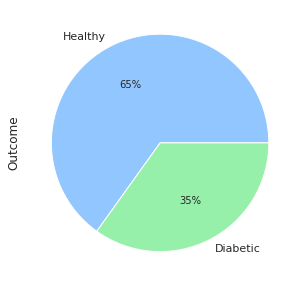

In [33]:
# Check Percentage of Healthy and Diabetic women
import matplotlib.style as style

style.use('seaborn-pastel')
labels = ["Healthy", "Diabetic"]
df['Outcome'].value_counts().plot(kind='pie',labels=labels, subplots=True,autopct='%1.0f%%', figsize=(5,5));

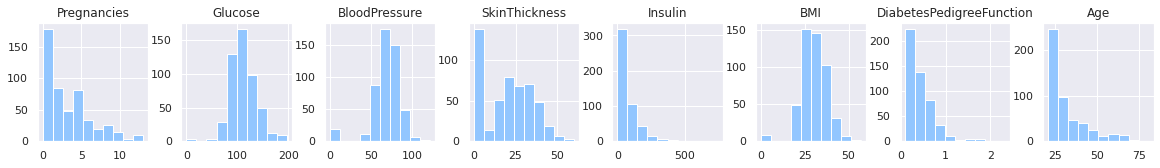

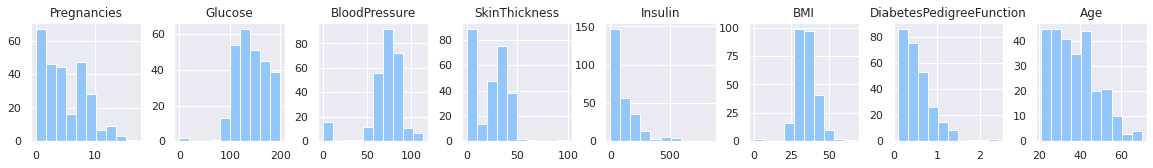

In [34]:
## See the variables with respect to outcome variable

df.groupby('Outcome').hist(figsize=(20,5),layout=(2,8),histtype='barstacked')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


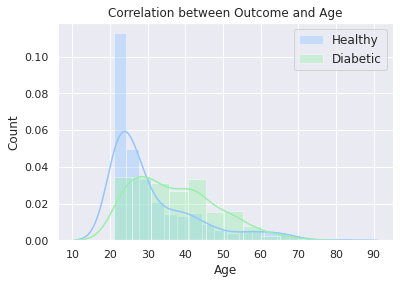

In [38]:
# Checkong Correlation between Outcome and Age

sns.distplot(df.loc[df['Outcome']==0, 'Age'],label='Healthy')
sns.distplot(df.loc[df['Outcome']==1, 'Age'], hist_kws=dict(alpha=0.4), label='Diabetic')
plt.legend(prop={'size': 12})
plt.title('Correlation between Outcome and Age')
plt.xlabel('Age')
plt.ylabel('Count')  
sns.set(rc={'figure.figsize':(8,4)})

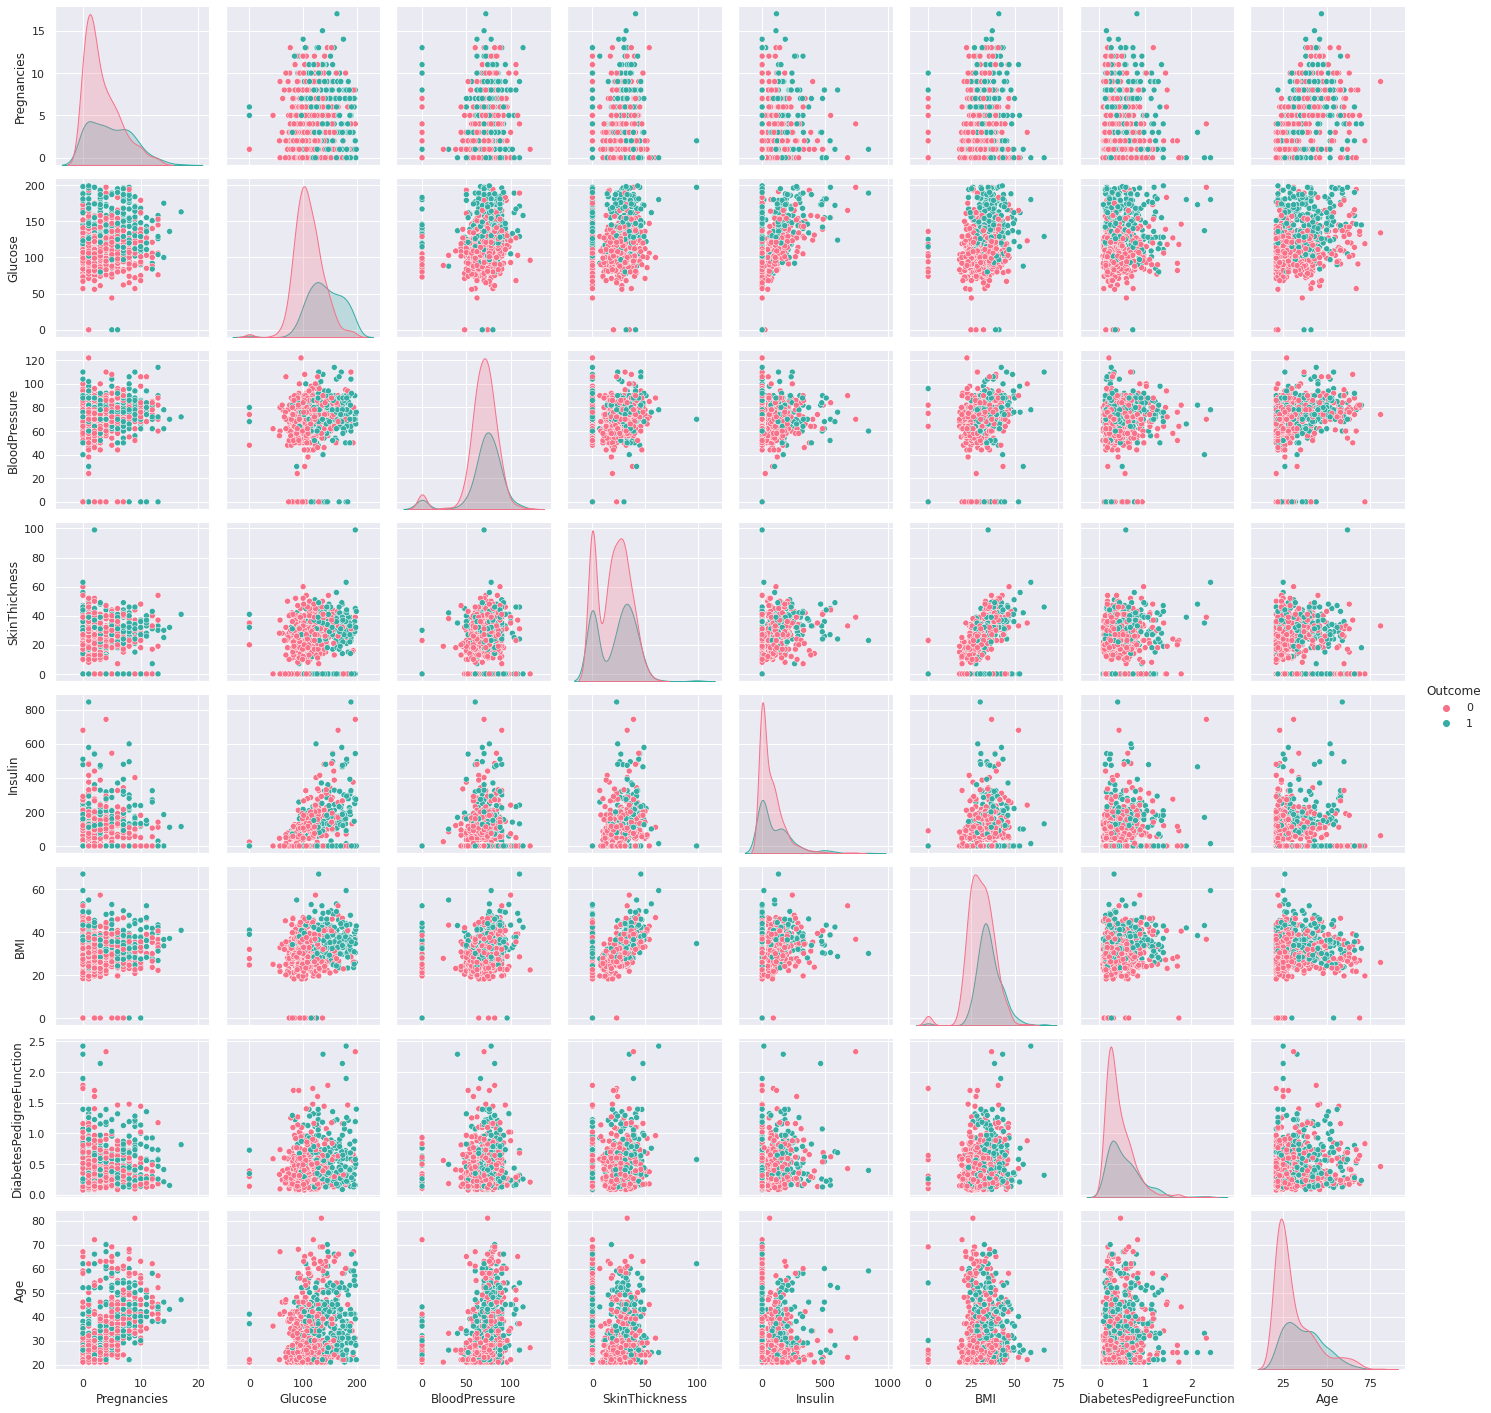

In [39]:
sns.pairplot(df,hue='Outcome',palette="husl")

#Now we use sklearn library for doing Logistic regression
First step: train, test split for dependent y vector and independent X variables
Then train model
Then Test Model
Predict accuracy

In [41]:
# Split the dataset

X = df.drop("Outcome", axis=1)
y = df.Outcome

In [59]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [60]:
from sklearn.linear_model import LogisticRegression

In [62]:
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
# Make prediction
predictions = model.predict(x_test)

In [64]:
score = model.score(x_test, y_test)
print(score)

0.7597402597402597


In [65]:
#Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [66]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[83 16]
 [21 34]]


Text(0.5, 1.0, 'Accuracy Score: 0.7597402597402597')

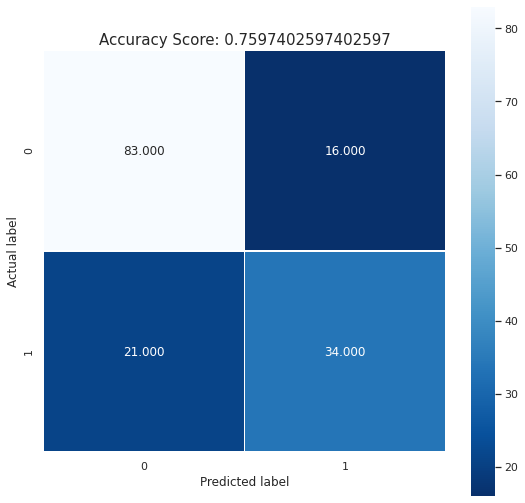

In [69]:
# Using Seaborn
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [ ]:
#Assignment: Practice on the provided dataset

In [79]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y, model.predict_proba(x)[:, 1])

0.8335597014925373

In [80]:
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

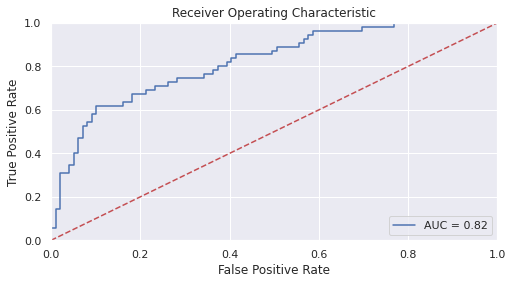

In [81]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
